In [1]:
import numpy as np
import torch

from matplotlib import pyplot as plt
from models import AlexNet
from scipy.spatial import distance
from scipy.spatial import distance_matrix

a = AlexNet()
layers = a.layers

In [2]:
root = "data/model-weights/pytorch-vision-classification/run_1"

layer_dists = []

W_f = torch.load(f"{root}/model_89.pth",
                   map_location=torch.device('cpu'))

for num in range(0,90):
    print(f"Calculating on model_{num}")
    
    W_i = torch.load(f"{root}/model_{num}.pth",
                       map_location=torch.device('cpu'))

    for layer in layers:
        target_layer = layers[layer]["weight"]
        W_f_layer = np.asarray(W_f["model"][target_layer]).flatten()
        W_i_layer = np.asarray(W_i["model"][target_layer]).flatten()
        
        dist = distance.euclidean(W_i_layer, W_f_layer)

        layer_dists.append(dist)

Calculating on model_0
Calculating on model_1
Calculating on model_2
Calculating on model_3
Calculating on model_4
Calculating on model_5
Calculating on model_6
Calculating on model_7
Calculating on model_8
Calculating on model_9
Calculating on model_10
Calculating on model_11
Calculating on model_12
Calculating on model_13
Calculating on model_14
Calculating on model_15
Calculating on model_16
Calculating on model_17
Calculating on model_18
Calculating on model_19
Calculating on model_20
Calculating on model_21
Calculating on model_22
Calculating on model_23
Calculating on model_24
Calculating on model_25
Calculating on model_26
Calculating on model_27
Calculating on model_28
Calculating on model_29
Calculating on model_30
Calculating on model_31
Calculating on model_32
Calculating on model_33
Calculating on model_34
Calculating on model_35
Calculating on model_36
Calculating on model_37
Calculating on model_38
Calculating on model_39
Calculating on model_40
Calculating on model_41
Ca

In [3]:
arr = np.array(layer_dists).reshape(-1, len(layers))

In [4]:
arr_final = arr/arr.max(axis=0)

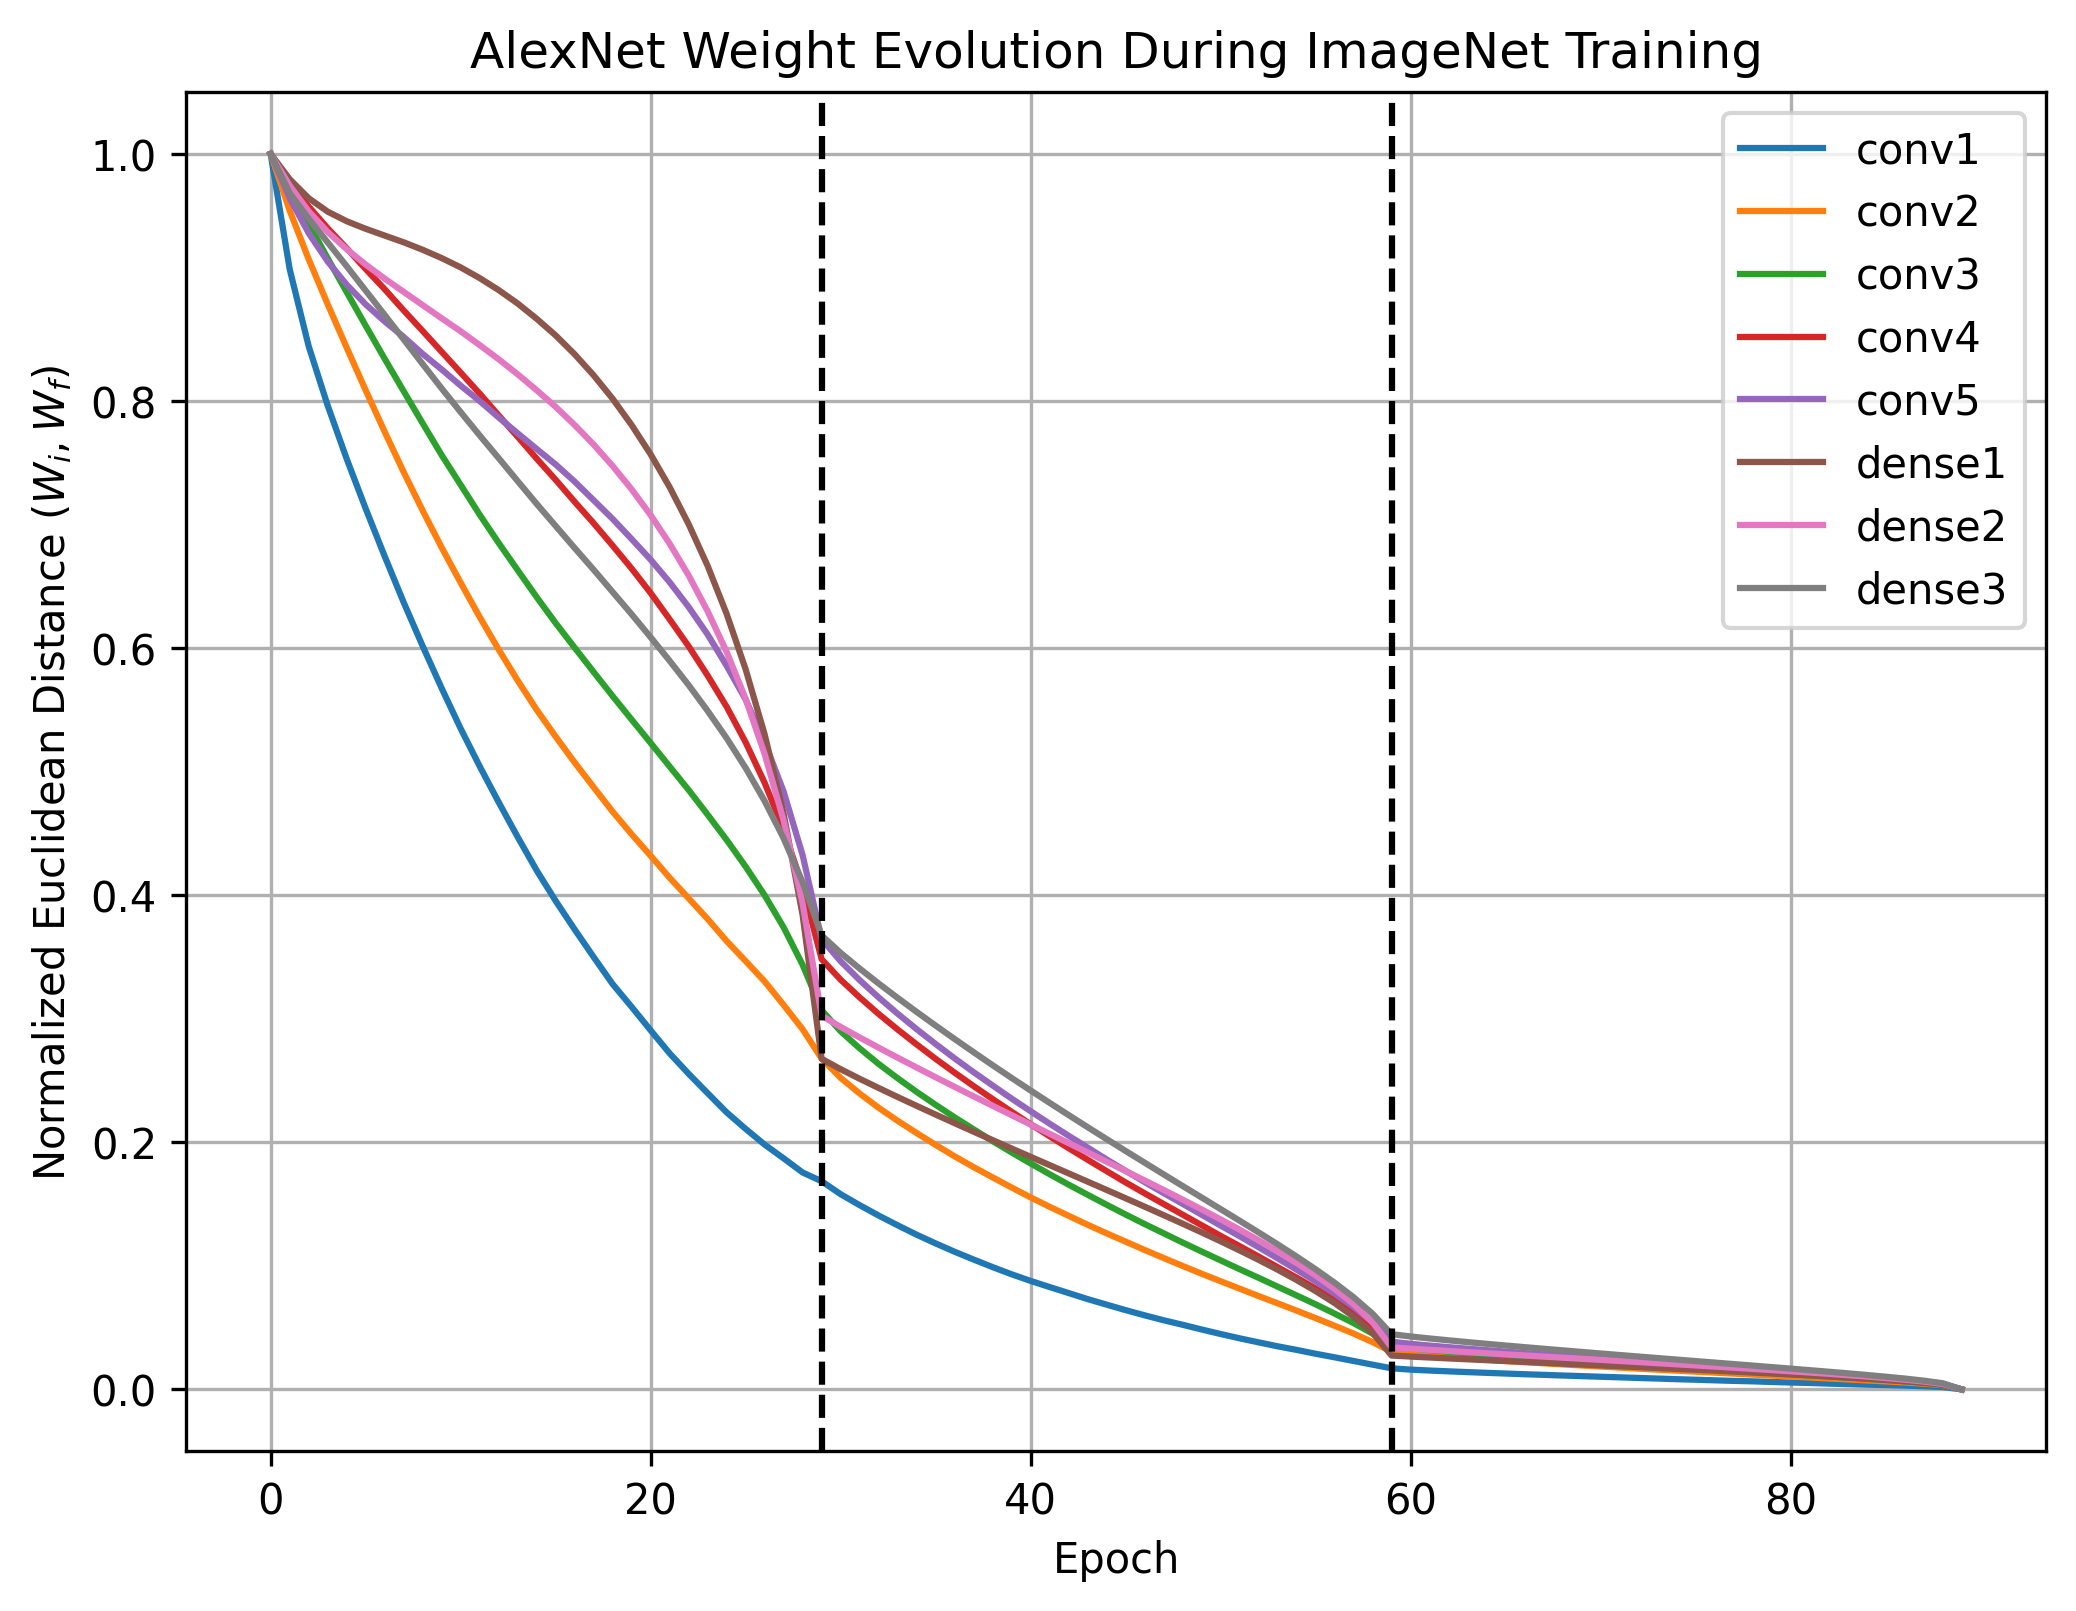

In [5]:
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(arr_final)
plt.grid()

plt.axvline(29, color="k", linestyle="--")
plt.axvline(59, color="k", linestyle="--")

plt.title('AlexNet Weight Evolution During ImageNet Training')
plt.xlabel('Epoch')
plt.ylabel('Normalized Euclidean Distance $ (W_{i}, W_{f}) $')
plt.legend(layers)